In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_pickle("/Users/kristophernolte/Documents/GitHub/helcaraxe/pdb_analysis/pdb_meta_tab.pkl")

In [5]:
#set index to numeral
df = df.reset_index(drop = True)
#format deposition date to datetime
df["Deposition Date"] = pd.to_datetime(df["Deposition Date"])
#remove all nan values from dataframe
df = df.loc[(df['F_ice'] != np.nan) & (df['I_ice'] != np.nan)]
#remove all -1 pdb_ids
clean_df = df.loc[(df["F_ice"] >= 0) | (df["I_ice"] >= 0)]

In [6]:
#get DataFrame of all ice contaminated entries
ice_df = clean_df.loc[(clean_df['F_ice'] > 0) | (clean_df['I_ice'] > 0)]

In [7]:
ice_df["Collection Temperature"].value_counts()

100.0    18076
110.0      385
93.0       272
80.0       214
77.0       202
         ...  
89.7         1
147.0        1
199.0        1
198.3        1
75.0         1
Name: Collection Temperature, Length: 161, dtype: int64

In [8]:
dates_pd = pd.DataFrame(clean_df["Deposition Date"].groupby(clean_df["Deposition Date"].dt.year).count())
ice_dates_pd = pd.DataFrame(ice_df["Deposition Date"].groupby(ice_df["Deposition Date"].dt.year).count())

In [9]:
len(clean_df[(clean_df['F_ice'] >= 0)])

109474

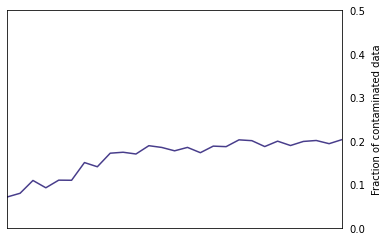

In [14]:
plt.plot(ice_dates_pd / dates_pd, color = "darkslateblue")
plt.xlim(1995,2021)
plt.ylabel("[%]")
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.tick_params(left=False)
plt.ylabel('Fraction of contaminated data', labelpad=-375, fontsize=10)
plt.xlim(1995,2021)
plt.ylim(0,0.5)
plt.xticks([])
plt.savefig("progession_ice.svg", transparent=True)

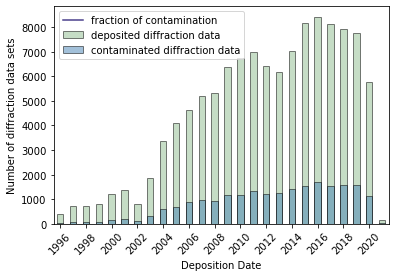

In [15]:
main_df = clean_df
main_df["Deposition Date"].loc[(main_df["Deposition Date"].dt.year > 1995)].groupby(main_df["Deposition Date"].dt.year).count().plot(kind="bar", alpha = 0.5, color="darkseagreen", edgecolor="black", label="deposited diffraction data")
ice_df["Deposition Date"].loc[(ice_df["Deposition Date"].dt.year > 1995)].groupby(ice_df["Deposition Date"].dt.year).count().plot(kind="bar", alpha = 0.5, color="steelblue", edgecolor="black", label="contaminated diffraction data")
plt.ylabel("Number of diffraction data sets")
plt.plot(1,1, label="fraction of contamination", color="darkslateblue")
plt.xticks(rotation=45)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.savefig("ice_contamination_pdb.svg")

In [ ]:
main_df["Reflections For Refinement"].plot.hist(bins=10000, xlim = (0, 50000),alpha = 0.5, color="darkseagreen", edgecolor="black", label="all diffraction data")
ice_df["Reflections For Refinement"].plot.hist(bins=10000, xlim = (0, 50000), alpha = 0.5, color="steelblue", edgecolor="black", label="Helcaraxe prediction > 0.5")
plt.legend()

/Users/kristophernolte/miniforge3/envs/ARM_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


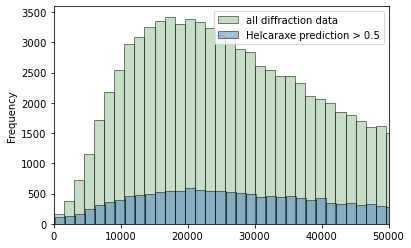